# Exercise 1 : Learning dataset and model performance

## Build the model

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# load data
X_train=np.load('data/digits/X_train_digits.npy')
y_train=np.load('data/digits/y_train_digits.npy')
X_test=np.load('data/digits/X_test_digits.npy')
y_test=np.load('data/digits/y_test_digits.npy')

# Question 1
# instantiate the model, add hidden and output layers
model1=Sequential()
model1.add(Dense(16, input_shape=(64,), activation='relu'))

# Question 2
# add the output layer
model1.add(Dense(10, activation='softmax'))

# Question 3
# compile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Question 4.a
# substract predictions of X_train from y_train (real values)
y=np.abs(np.around(model1.predict(X_train))-y_train)

# test each row of y and check if its columns are zeros, then, get their number of zero rows using shape[0] 
print('well predicted : {} samples'.format(y[np.all(y == 0, axis=1)].shape[0])) 
print('false predicted : {} samples'.format(y[~np.all(y == 0, axis=1)].shape[0]))

# Question 4.b
acc_train=model1.evaluate(X_train, y_train, verbose=0)[1]
print('train accuracy (method 1) : {}'.format(np.round(acc_train, 4)))
# compute the accuracy using the classic formula : accuracy=(good predictions)/(all data)
print('train accuracy (method 2) : {}'.format(np.round(y[np.all(y == 0, axis=1)].shape[0]/y_train.shape[0],4))) 

# save model initial weights for further questions (not updating them for comparison purpose)
initial_weights=model1.get_weights()

well predicted : 88 samples
false predicted : 1169 samples
train accuracy (method 1) : 0.0796
train accuracy (method 2) : 0.07


## Model performance

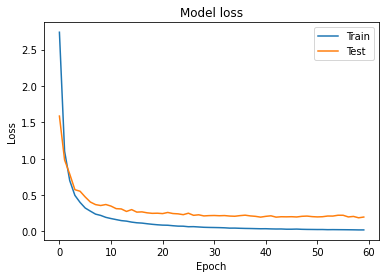

In [2]:
import matplotlib.pyplot as plt

# Question 5
# restore initial weights for reliable multiple tests 
model1.set_weights(initial_weights)
# train the model 
h=model1.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)

# Question 6
# define the loss plot function
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

# Question 7
# plot train and test losses
plot_loss(h.history['loss'], h.history['val_loss'])

# the loss curve shows a slight overfitting

## Data relevance

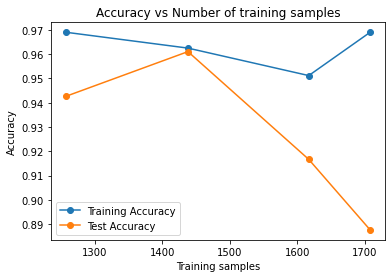

In [3]:
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
import numpy

# Question 8
# concatenate train and test features in X_digits  
X_digits=np.concatenate((X_train, X_test), axis=0)
# concatenate train and test labels in y_digits
y_digits=np.concatenate((y_train, y_test), axis=0)
# the data is merged beacuse the optimal train and test dataset will be determined below by the program

# Question 9
# define train subsets sizes to : 70% 80% 90% 95% of the total amount of data
train_sizes=np.array([1257, 1438, 1617, 1708]) 

# Question 10
# define the early stopping callback
early_stop=EarlyStopping(monitor='accuracy', patience=1)

# lists for storing accuracies 
train_accs = [] 
test_accs = []

for size in train_sizes:
  	# Get a fraction of training data
    X_train_frac, X_test_frac, y_train_frac, y_test_frac = train_test_split(X_digits, y_digits, train_size=size)

    # restore initial weights for a fair comparison 
    model1.set_weights(initial_weights)

    # train the model
    model1.fit(X_train_frac, y_train_frac, epochs=50, callbacks=[early_stop], verbose=0)
    
    # Question 11
    # evaluate and store results for the training fraction
    train_acc=model1.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
    train_accs.append(train_acc)
    # evaluate and store results for the test set
    test_acc=model1.evaluate(X_test_frac, y_test_frac, verbose=0)[1]
    test_accs.append(test_acc)

# Question 12
# define the accuracy plot function
def plot_results(train_accs,test_accs):
  plt.plot(train_sizes, train_accs, 'o-', label="Training Accuracy")
  plt.plot(train_sizes, test_accs, 'o-', label="Test Accuracy")
  plt.title('Accuracy vs Number of training samples')
  plt.xlabel('Training samples')
  plt.ylabel('Accuracy')
  plt.legend(loc="best")
  plt.show()

# plot train and test accuracies
plot_results(train_accs, test_accs)

# Exercise 2 : Hyperparameters supervision

## Activation function supervision

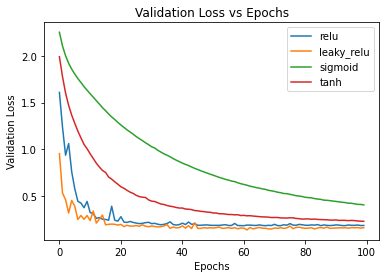

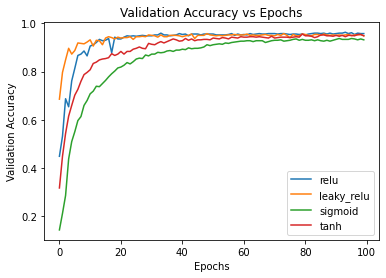

In [4]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas
import numpy as np

# Question 1
# define get_model function with a configurable activation
def get_model(act_function):    
    model2a = Sequential()
    if act_function=='leaky_relu':
        model2a.add(Dense(16, input_shape=(64,), activation=LeakyReLU()))
    else:
        model2a.add(Dense(16, input_shape=(64,), activation=act_function))

    model2a.add(Dense(10, activation='softmax'))
    model2a.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model2a

# Question 2
# set of activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# declare dictionaries to save loss history and accuracy history for each activation
val_loss_per_function = {}
val_acc_per_function = {}

# Question 3
# loop over the activation functions
for act in activations:
  # get a new model with the current activation
  model2a = get_model(act)
    
  # Question 4
  # fit the model
  history = model2a.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
  
  # Question 5
  # save validation loss history and accuracy history
  val_loss_per_function[act]=history.history['val_loss']
  val_acc_per_function[act]=history.history['val_accuracy']

# Question 6
# create a dataframe from val_loss_per_function
val_loss = pandas.DataFrame(val_loss_per_function)
# create a dataframe from val_acc_per_function
val_acc = pandas.DataFrame(val_acc_per_function)

# Question 7
# plot test loss using the dataframe plot function
val_loss.plot()
plt.title('Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

# plot test accuracy using the dataframe plot function
val_acc.plot()
plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.show()

## Batch size supervision

In [5]:
# Question 8
# define new get_model function without arguments
def get_model():
  model2b=Sequential()
  model2b.add(Dense(16, input_dim=64, activation=LeakyReLU()))
  model2b.add(Dense(10, activation='softmax'))
  model2b.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
  return model2b

# Question 10 
batch_all_data=X_train.shape[0]

# Question 9
# define an array of batch sizes
batch_sizes=[1, 16, 32, 64, 128, 256, 512, batch_all_data]

# declare lists for saving accuracies and losses 
val_loss=[]
val_acc=[]

# train the model with different batch sizes
for bsize in batch_sizes:
    # get the initial model at each iteration for fair comparison purpose 
    model2b=get_model()   
    
    # train the model
    h=model2b.fit(X_train, y_train, epochs=5, batch_size=bsize, verbose=0)    
    
    # save rounded loss values in the list 
    val_loss.append(np.round(model2b.evaluate(X_test, y_test, verbose=0)[0],4))    
    # save rounded accuracy values in the list
    val_acc.append(np.round(model2b.evaluate(X_test, y_test, verbose=0)[1],4))

# Question 11
# print results 
print("{:10} | {:7} | {:8}".format('Batch Size', 'Loss', 'Accuracy'))
for i in range(len(batch_sizes)):
    print("{:10} | {:7} | {:8}".format(batch_sizes[i], val_loss[i], val_acc[i]))    

Batch Size | Loss    | Accuracy
         1 |  9.5193 |   0.7556
        16 |  0.2679 |   0.9167
        32 |  0.3105 |   0.9074
        64 |  0.5737 |   0.8352
       128 |    0.79 |     0.75
       256 |  1.5217 |    0.513
       512 |  2.3673 |   0.4074
      1257 |  3.4602 |   0.2074


# Batch normalization

In [6]:
# Question 11
from keras.layers import BatchNormalization

# Question 12
# build the model
norm_model=Sequential()
norm_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='RandomNormal'))
# add batch normalization layer
norm_model.add(BatchNormalization())
norm_model.add(Dense(50, activation='relu', kernel_initializer='RandomNormal'))
# add batch normalization layer
norm_model.add(BatchNormalization())
norm_model.add(Dense(50, activation='relu', kernel_initializer='RandomNormal'))
# add batch normalization layer
norm_model.add(BatchNormalization())
norm_model.add(Dense(10, activation='softmax'))

# Question 13
# compile the model
norm_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## Batch normalization effect

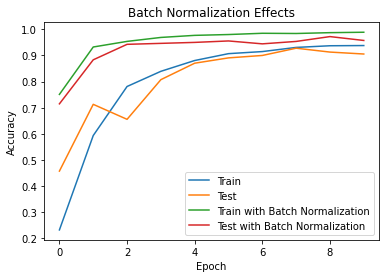

In [7]:
# Question 14
# build the model
standard_model=Sequential()
standard_model.add(Dense(50, input_shape=(64,), activation='relu', kernel_initializer='RandomNormal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='RandomNormal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='RandomNormal'))
standard_model.add(Dense(10, activation='softmax'))
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Question 15
# train the standard model and save its history
hist_stdr=standard_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Question 16
# train the batch normalized model and save its history
hist_norm=norm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=0)

# Question 17
# define the function that plots accuracies from histories
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['accuracy'])
  plt.plot(h1.history['val_accuracy'])
  plt.plot(h2.history['accuracy'])
  plt.plot(h2.history['val_accuracy'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

# plot the accuracy of train and test data for both models (standard_model and norm_model)
compare_histories_acc(hist_stdr, hist_norm)

# Exercise 3 : Hyperparameters optimization

## Build a parametric model

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import numpy as np

# Question 1
# define create_model function with activation and learning rate as parameters 
def create_model(learning_rate=0.01, activation='relu'):
  # create an Adam optimizer with a parametric learning rate
  opt = Adam(lr=learning_rate)
  
  # Question 2
  # create the model  
  model = Sequential()
  model.add(Dense(128, input_shape=(30,), activation=activation))
  model.add(Dense(256, activation=activation))
  model.add(Dense(1, activation='sigmoid'))
  
  # compile the model with a parametric optimizer
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

## Hyperparameters optimization

In [9]:
# Question 3
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score 

# Question 4
# create a KerasClassifier with a keras model (returnd by create_model) and wrap it to a scikit-learn model (skmodel)
skmodel = KerasClassifier(build_fn=create_model) 

# Question 5
# define a dictionary of hyperparameters values to try
params = {'activation':['relu', 'tanh', 'sigmoid'], 
          'batch_size':[64, 128, 256], 
          'epochs':[50, 100, 200], 'learning_rate':[0.1, 0.01, 0.001]}

# Question 6
# create a randomize search object with skmodel and hyperparameters values
# RandomizedSearchCV evaluates the model for each combination of hyperparameters values 
# n_jobs=-1 parallelize on all CPU cores due to the computational complexity 
# cv=3 is the cross validation splitting strategy for model validation 
random_search = RandomizedSearchCV(skmodel, param_distributions=params, cv=3, n_jobs=-1)

# load data
X=np.load('data/disease/X_disease.npy')
y=np.load('data/disease/y_disease.npy')

# Question 7
# train the model with all combinations of hyperparameters values
random_search_results = random_search.fit(X, y, verbose=0) 

# Question 8
# print optimal hyperparameters 
print("Best: {} using {}".format(np.round(random_search_results.best_score_,4), random_search_results.best_params_))

Best: 0.9754 using {'learning_rate': 0.001, 'epochs': 200, 'batch_size': 256, 'activation': 'relu'}


## Cross-validation

In [10]:
# Question 9 
# Create a KerasClassifier with the optimal hyperparameters retrieved previsouly
sk_opt_model = KerasClassifier(build_fn=create_model, learning_rate=0.01, epochs=100, batch_size=64, 
                               activation='tanh', verbose=0)

# Question 10
# calculate the cross-validation and return folds accuracy 
acc_scores = cross_val_score(sk_opt_model, X, y, cv=5, n_jobs=-1)

# Question 11
# Print folds mean accuracy
print('The mean accuracy of folds is:', np.round(acc_scores.mean(),4))

# Print folds accuracy standard deviation
print('The standard deviation of folds accuracy is:', np.round(acc_scores.std(),4))


The mean accuracy of folds is: 0.9771
The standard deviation of folds accuracy is: 0.0132
